In [207]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [208]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step)
print(X.size())
X1 = X.unsqueeze(dim =1)
print(X1.size())

y = weight * X + bias
X[:10],y[:10]


torch.Size([50])
torch.Size([50, 1])


(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260]))

In [209]:
len(X) , len(y)

(50, 50)

In [210]:
###Splitting data into train and test sets
train_split = int(0.8 * len(X))
train_split
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test),len(y_test)

(40, 40, 10, 10)

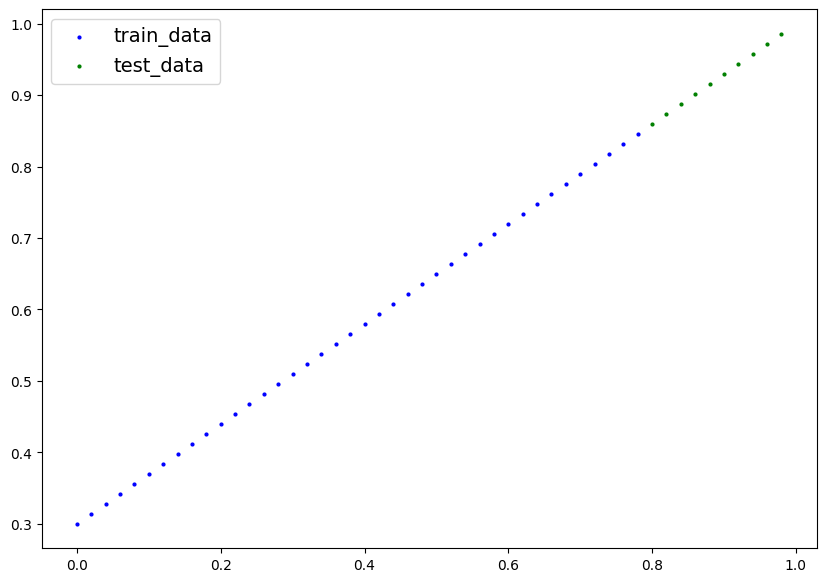

In [211]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c = "b", s = 4, label = "train_data")
    plt.scatter(test_data, test_labels, c = "g", s = 4, label = "test_data")
    if predictions is not None:
      plt.scatter(test_data, predictions, c = "r", s = 4, label = "predictions")
    plt.legend(prop={"size": 14});

plot_predictions(X_train,y_train,X_test,y_test);

In [212]:
###Imnplementing neural networks without torch.NN
torch.manual_seed(42)
###define the layers
input_size = 2
hidden_size = 4
output_size = 1
###weights and bias tensors
weight1 = torch.randn(input_size,hidden_size, requires_grad = True)
bias1 = torch.randn(1, hidden_size, requires_grad = True)
weight2 = torch.randn(hidden_size, output_size, requires_grad = True)
bias2 = torch.randn(1, output_size, requires_grad = True)
def forward(x:torch.Tensor):
  activation = torch.sigmoid(x @ weight1 + bias1)
  output = activation @ weight2 + bias2
  return output
x = torch.randn(5,2)
print(x)
output = forward(x)
print(output)

tensor([[ 0.8172, -0.7658],
        [-0.7506,  1.3525],
        [ 0.6863, -0.3278],
        [ 0.7950,  0.2815],
        [ 0.0562,  0.5227]])
tensor([[1.6958],
        [0.2172],
        [1.3730],
        [0.8919],
        [0.6855]], grad_fn=<AddBackward0>)


In [213]:
###building the model using Pytorch
from torch import nn
class linearRegressionModel(nn.Module):
  def __init__(self, weights, bias):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights * x + self.bias


In [214]:
###check the contents of Pytorch module
torch.manual_seed(42)
###creating an instance of the created model
weights = torch.randn (2,4)
biass = torch.randn(4)
model_0 = linearRegressionModel(weights, biass)
list(model_0.parameters())
###name the parameters
model_0.state_dict()

OrderedDict([('weights', tensor([1.1103])), ('bias', tensor([-1.6898]))])

In [215]:
weight, bias
X_test

tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
        0.9800])

In [216]:
###making predictions on data to check the loss functions generated by the weights and biases
###prediction of y_test based on X_test
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds



tensor([-0.8016, -0.7794, -0.7572, -0.7349, -0.7127, -0.6905, -0.6683, -0.6461,
        -0.6239, -0.6017])

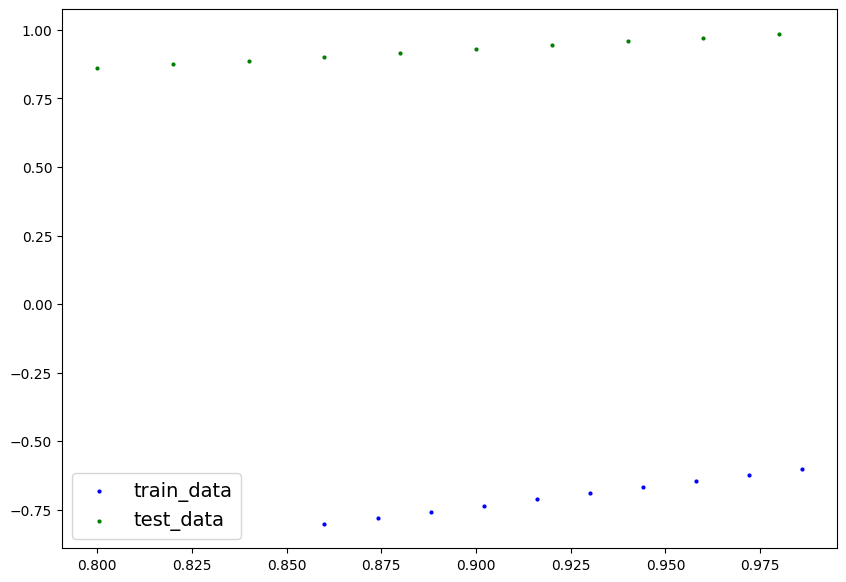

In [217]:
plot_predictions(y_test,y_preds)

In [218]:
###The model performs poorly and the predicted points in the above plot seem far off from the y_labels of the test data.
###The current weights and bias are not able to assign proper y_labels to the test data, therefore we need to update the weights and bias so that the accuracy of prediction is imporved
###In order to improve the model, we must evaluate how poorly the model is currently behaving , therefore calculate the loss function
loss_fn = nn.L1Loss()
loss = loss_fn(y_preds,y_test)
loss

###set up an optimiser
optimizer =torch.optim.SGD(params=model_0.parameters(),lr = 0.01)





Build a training loop and a testing loop
 Loop through data
 Forward pass to estimate weights and bias
 Calculate L1Loss
 Optimise weights and bias using Stochastic Gradient Descent
 Backpropogation




---



In [219]:
epochs =100
###Loop through data
for epoch in range(epochs):
  model_0.train() ##set training mode
  ###forward pass
  y_pred = model_0(X_train)
  ###calculating the loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  print(model_0.state_dict())

Loss: 1.829785704612732
OrderedDict({'weights': tensor([1.1142]), 'bias': tensor([-1.6798])})
Loss: 1.8182647228240967
OrderedDict({'weights': tensor([1.1181]), 'bias': tensor([-1.6698])})
Loss: 1.8067436218261719
OrderedDict({'weights': tensor([1.1220]), 'bias': tensor([-1.6598])})
Loss: 1.7952226400375366
OrderedDict({'weights': tensor([1.1259]), 'bias': tensor([-1.6498])})
Loss: 1.7837016582489014
OrderedDict({'weights': tensor([1.1298]), 'bias': tensor([-1.6398])})
Loss: 1.7721807956695557
OrderedDict({'weights': tensor([1.1337]), 'bias': tensor([-1.6298])})
Loss: 1.7606595754623413
OrderedDict({'weights': tensor([1.1376]), 'bias': tensor([-1.6198])})
Loss: 1.749138593673706
OrderedDict({'weights': tensor([1.1415]), 'bias': tensor([-1.6098])})
Loss: 1.7376177310943604
OrderedDict({'weights': tensor([1.1454]), 'bias': tensor([-1.5998])})
Loss: 1.726096510887146
OrderedDict({'weights': tensor([1.1493]), 'bias': tensor([-1.5898])})
Loss: 1.7145757675170898
OrderedDict({'weights': tens

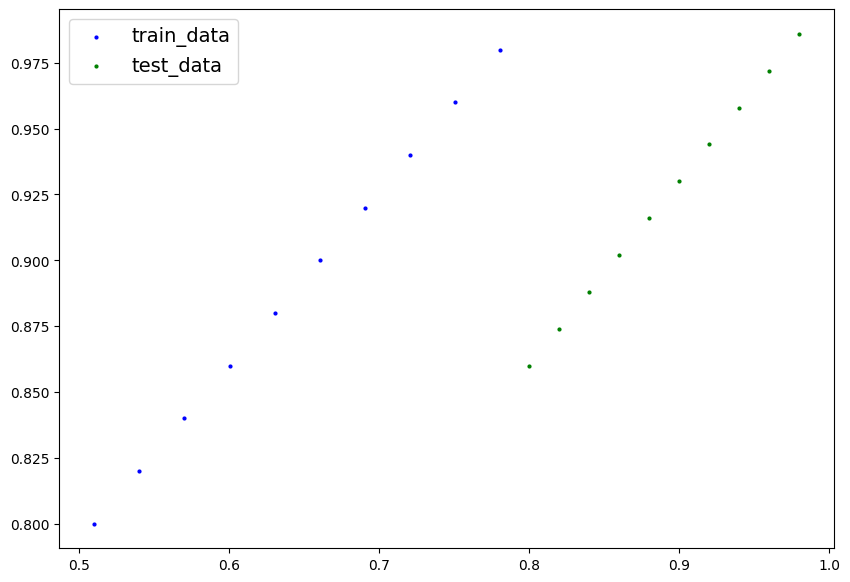

In [220]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)
plot_predictions(y_pred_new, X_test)